# Polynomial Regression with Interaction Terms  
## Modeling Stellar Luminosity Using Mass and Temperature
- Student: Juan José Mejía Celis
- Class: AREP 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,5)

## Dataset

In [2]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

## Dataset Visualization with Temperature Encoding

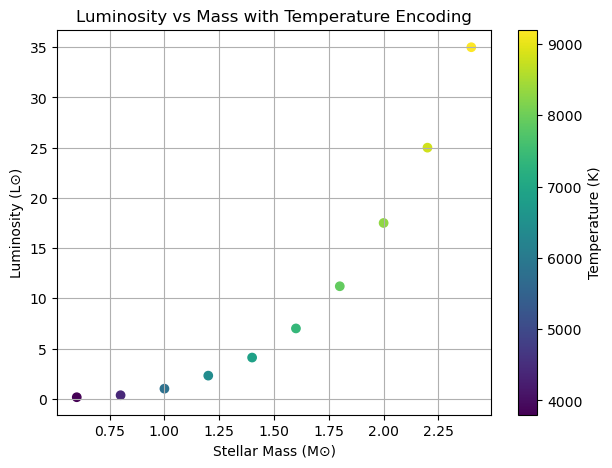

In [3]:
plt.scatter(M, L, c=T, cmap="viridis")
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.colorbar(label="Temperature (K)")
plt.title("Luminosity vs Mass with Temperature Encoding")
plt.grid(True)
plt.show()

At fixed mass, hotter stars tend to be more luminous, suggesting the importance
of temperature and interaction effects.

## Polynomial Feature Engineering and Design Matrix Construction

In [4]:
X = np.column_stack([
    M,
    T,
    M**2,
    M * T
])

## Linear Model Definition and Mean Squared Error Loss

In [5]:
def predict(X, w, b):
    return X @ w + b

def mse(actual, predicted):
    return np.mean((actual - predicted)**2)

## Vectorized Gradient Computation

In [6]:
def gradients(X, y, w, b):
    N = len(y)
    pred = predict(X, w, b)
    error = pred - y
    grad_w = (2/N) * X.T @ error
    grad_b = (2/N) * np.sum(error)
    return grad_w, grad_b

## Gradient Descent Training Procedure

In [7]:
def train(X, y, alpha=1e-12, iterations=5000):
    w = np.zeros(X.shape[1])
    b = 0.0
    loss_hist = []

    for _ in range(iterations):
        pred = predict(X, w, b)
        loss_hist.append(mse(y, pred))

        grad_w, grad_b = gradients(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

    return w, b, loss_hist

## Feature Selection Experiment and Model Comparison

In [8]:
models = {
    "M1: [M, T]": X[:, :2],
    "M2: [M, T, M^2]": X[:, :3],
    "M3: [M, T, M^2, M*T]": X
}

results = {}

for name, X_model in models.items():
    w, b, loss_hist = train(X_model, L)
    results[name] = (w, b, loss_hist[-1])
    print(f"{name}: final_loss={loss_hist[-1]:.3f}")

M1: [M, T]: final_loss=138.181
M2: [M, T, M^2]: final_loss=138.181
M3: [M, T, M^2, M*T]: final_loss=41.396


## Predicted Versus Actual Luminosity Analysis 

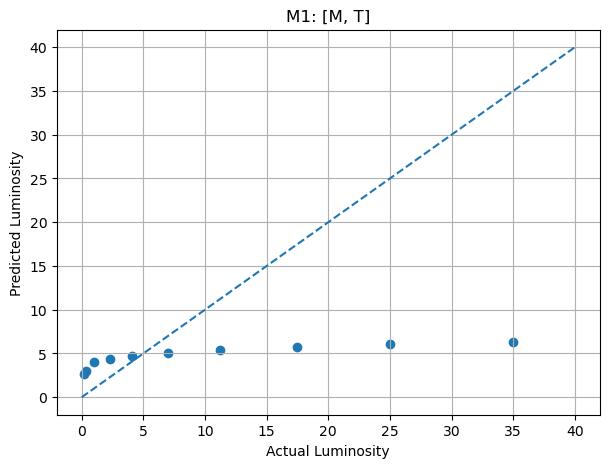

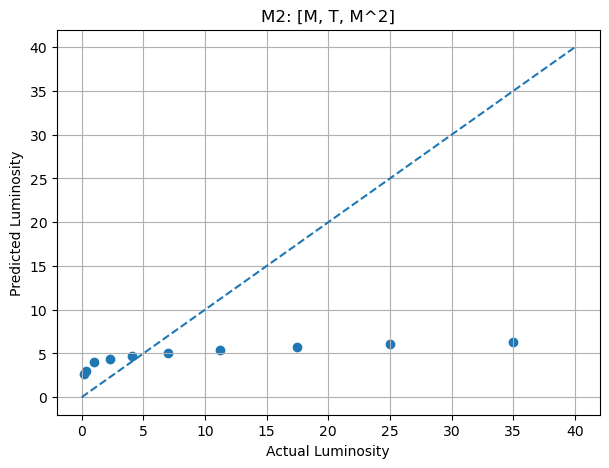

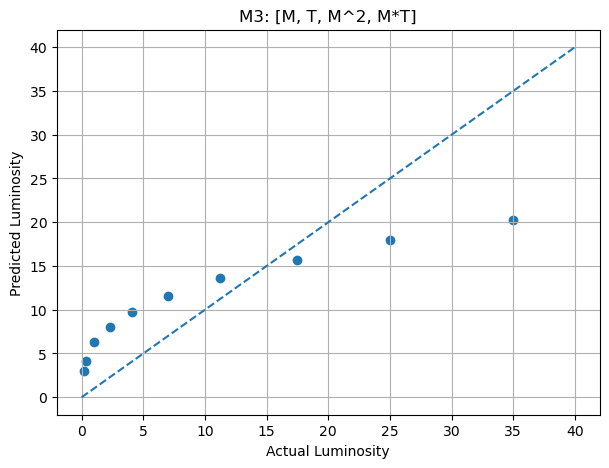

In [9]:
for name, X_model in models.items():
    w, b, _ = train(X_model, L)
    L_pred = predict(X_model, w, b)

    plt.scatter(L, L_pred)
    plt.plot([0, 40], [0, 40], "--")
    plt.xlabel("Actual Luminosity")
    plt.ylabel("Predicted Luminosity")
    plt.title(name)
    plt.grid(True)
    plt.show()

## Cost Sensitivity Analysis for the Interaction Term

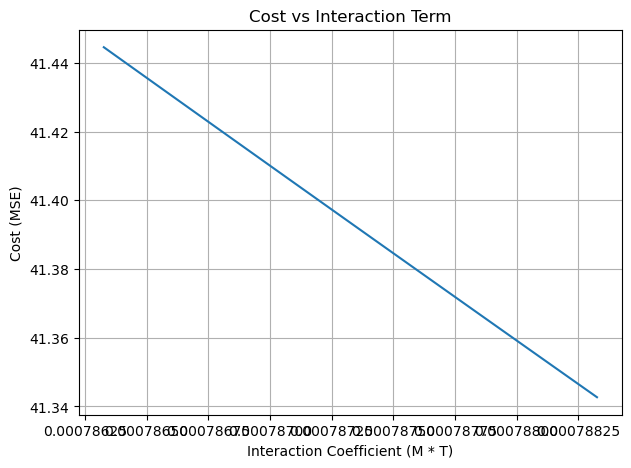

In [10]:
w_full, b_full, _ = train(X, L)

w_interaction = np.linspace(w_full[3] - 1e-6, w_full[3] + 1e-6, 100)
costs = []

for w_mt in w_interaction:
    w_temp = w_full.copy()
    w_temp[3] = w_mt
    costs.append(mse(L, predict(X, w_temp, b_full)))

plt.plot(w_interaction, costs)
plt.xlabel("Interaction Coefficient (M * T)")
plt.ylabel("Cost (MSE)")
plt.title("Cost vs Interaction Term")
plt.grid(True)
plt.show()

A clear minimum indicates that the interaction term significantly contributes
to explaining stellar luminosity.


## Inference on a New Stellar Observation

In [11]:
M_new = 1.3
T_new = 6600

X_new = np.array([[M_new, T_new, M_new**2, M_new*T_new]])
L_pred = predict(X_new, w_full, b_full)

print(f"Luminosity prediction: {L_pred[0]:.2f} L⊙")

Luminosity prediction: 8.80 L⊙


The predicted luminosity lies between neighboring data points and is physically
reasonable for a main-sequence star.


## Conclusions and Model Interpretation

Polynomial and interaction terms substantially improve model expressiveness,
capturing nonlinear stellar behavior beyond linear regression.
